<a href="https://colab.research.google.com/github/silkk-nn/superAI/blob/main/Detectron2_in_the_nutshell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set up Environment For Detectron2

In [ ]:
!pip install pyyaml==5.1 --quiet
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html --quiet
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html --quiet


     |████████████████████████████████| 274 kB 9.1 MB/s 
     |████████████████████████████████| 7.6 MB 7.4 MB/s 
     |████████████████████████████████| 23.2 MB 1.4 MB/s 
     |█████████████                   | 834.1 MB 1.3 MB/s eta 0:16:02tcmalloc: large alloc 1147494400 bytes == 0x56445fb2e000 @  0x7fb6de654615 0x56445daeb4cc 0x56445dbcb47a 0x56445daee2ed 0x56445dbdfe1d 0x56445db61e99 0x56445db5c9ee 0x56445daefbda 0x56445db61d00 0x56445db5c9ee 0x56445daefbda 0x56445db5e737 0x56445dbe0c66 0x56445db5ddaf 0x56445dbe0c66 0x56445db5ddaf 0x56445dbe0c66 0x56445db5ddaf 0x56445daf0039 0x56445db33409 0x56445daeec52 0x56445db61c25 0x56445db5c9ee 0x56445daefbda 0x56445db5e737 0x56445db5c9ee 0x56445daefbda 0x56445db5d915 0x56445daefafa 0x56445db5dc0d 0x56445db5c9ee
     |████████████████▌               | 1055.7 MB 1.3 MB/s eta 0:13:00tcmalloc: large alloc 1434370048 bytes == 0x5644a4184000 @  0x7fb6de654615 0x56445daeb4cc 0x56445dbcb47a 0x56445daee2ed 0x56445dbdfe1d 0x56445db61e99 0x56445db5c9ee

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.9.0+cu111
True


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import cv2
from google.colab.patches import cv2_imshow

#Get Image

In [43]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O test1.jpg
!wget http://farm9.staticflickr.com/8510/8463333311_4146da0be0_z.jpg -q -O test2.jpg
!wget http://farm4.staticflickr.com/3187/3106071608_e606309a5e_z.jpg -q -O test3.jpg
!wget http://farm5.staticflickr.com/4122/4801833407_5ae7ef5820_z.jpg -q -O test.jpg


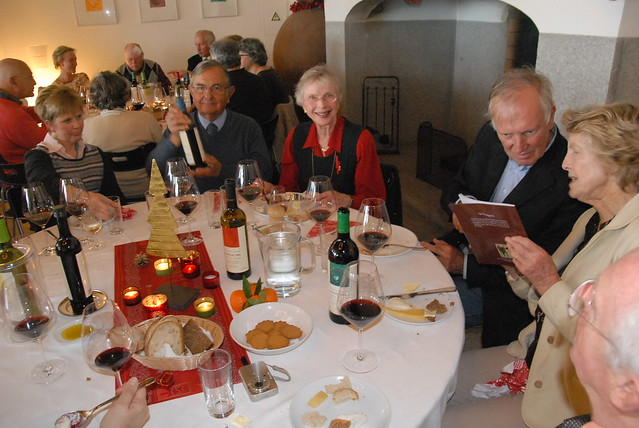

In [31]:
image = cv2.imread("test3.jpg")
cv2_imshow(image)

# Pre-trained detectron2 model

**Get pre-trained model from Detectron2 Github**
<br>
https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md


Example model by Detectron 2


*   Object Detection 
```
COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml
```



*  Instance Segmentation
```
COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml
```

*  Person Keypoint Detection
```
COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml
```
* Panoptic Segmentation
```
COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml
```




In [59]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [60]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0, 40, 39, 60, 41,  0, 40, 40, 41, 39, 40,  0, 40,  0,  0, 45,  0,
         0,  0, 39, 40, 44, 40, 56,  0, 40, 73, 40, 43, 27,  0,  0, 40, 41, 41],
       device='cuda:0')
Boxes(tensor([[421.3043,  65.6099, 591.8022, 360.2052],
        [275.6297,  65.4951, 385.9906, 212.4929],
        [336.6488, 257.6083, 385.2572, 375.5139],
        [220.9985, 178.1787, 250.9794, 280.3860],
        [ 23.9069, 168.8076, 484.7358, 424.9365],
        [197.2337, 349.0580, 235.9052, 416.9399],
        [479.6695,  88.7060, 636.8293, 423.9160],
        [170.2824, 175.8400, 202.1054, 242.3162],
        [ 80.0478, 299.2753, 138.8885, 399.7538],
        [252.9666, 220.1366, 303.8629, 297.2268],
        [327.2357, 203.8072, 360.3961, 325.4460],
        [235.8009, 159.2595, 262.2913, 211.5401],
        [150.2210,  60.4439, 270.7293, 192.1725],
        [304.7929, 175.1034, 335.8430, 262.2711],
        [ 25.1884,  84.7651, 120.1303, 208.3850],
        [  0.0000,  59.4642,  49.4014, 171.3088],
        [

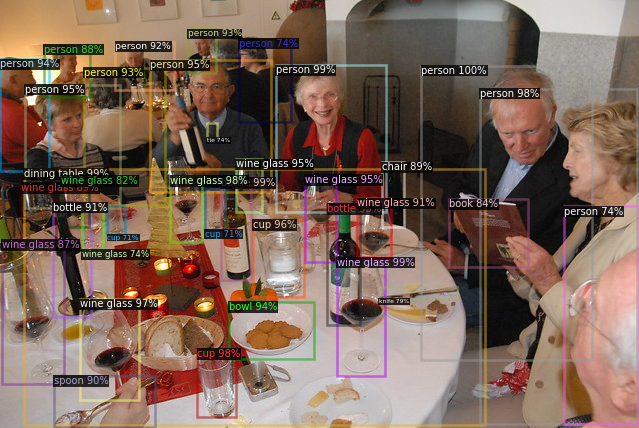

In [61]:
viz = Visualizer(image[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
output = viz.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(output.get_image()[:,:,::-1])

## Create Function

In [52]:
def pre_model(image, task, theshold=0.7):
    OD = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
    IS = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
    KP = "COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"
    PN = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
    cfg = get_cfg()
    if task == "OD":
        cfg.merge_from_file(model_zoo.get_config_file(OD))
        cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(OD)
    elif task == "IS":
        cfg.merge_from_file(model_zoo.get_config_file(IS))
        cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(IS)
    elif task == "KP":
        cfg.merge_from_file(model_zoo.get_config_file(KP))
        cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(KP)
    elif task == "PN":
        cfg.merge_from_file(model_zoo.get_config_file(PN))
        cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(PN)
        cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = theshold
        predictor = DefaultPredictor(cfg)
        panoptic_seg, segments_info = predictor(image)["panoptic_seg"]
        viz = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
        out = viz.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
        cv2_imshow(out.get_image()[:, :, ::-1])
        return
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = theshold
    predictor = DefaultPredictor(cfg)
    outputs = predictor(image)
    viz = Visualizer(image[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
    output = viz.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(output.get_image()[:,:,::-1])

### Object Detection

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


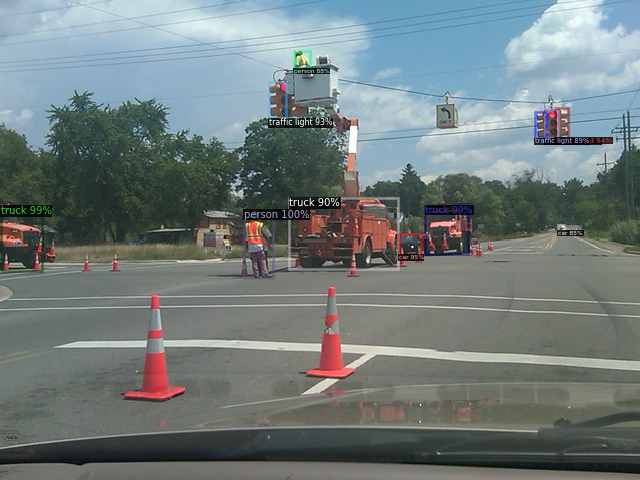

In [53]:
image = cv2.imread("test.jpg")
pre_model(image, "OD")

###Instance Segmentation

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


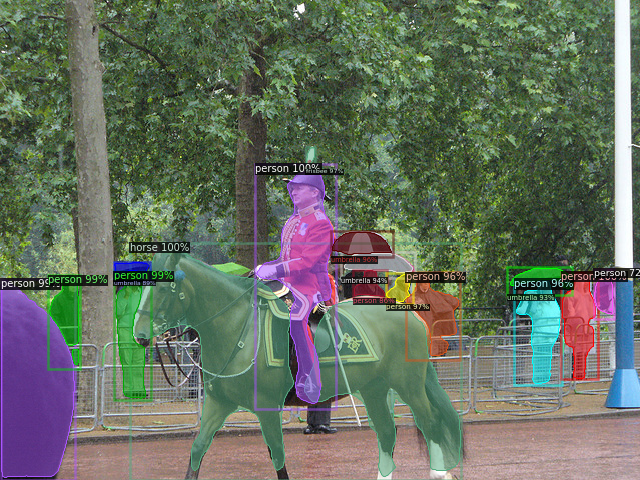

In [54]:
image = cv2.imread("test1.jpg")
pre_model(image, "IS")

###Person Keypoint Detection

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


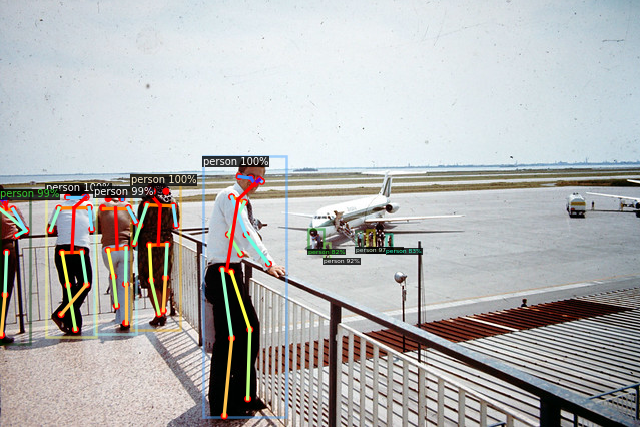

In [55]:
image = cv2.imread("test2.jpg")
pre_model(image, "KP")

###Panoptic Segmentation

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


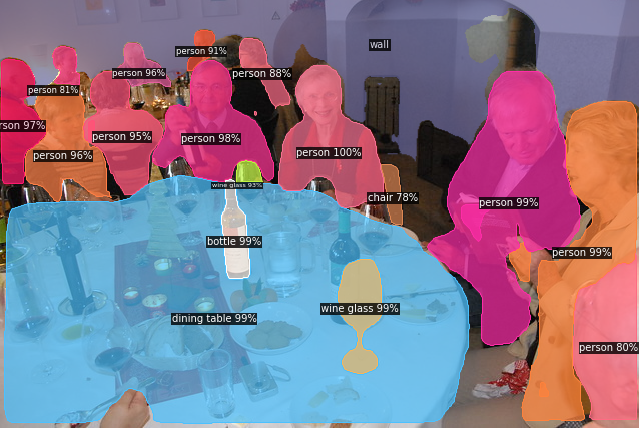

In [58]:
image = cv2.imread("test3.jpg")
pre_model(image, "PN")